In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("temp_datalab_records_social_facebook.csv")
#df

/Users/liuxinyi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
d = df.groupby(['username'])['talking_about_count'].var().reset_index(name = 'volatility')
d = d.sort_values(by = ['volatility'],ascending=False)
top15 = list(d['username'][:15])
#d

In [5]:
talkabout = []
for i in range(15):
    view = df[df['username'] == top15[i]]
    talkabout.append(list(view['talking_about_count']))
#talkabout  

In [98]:
view = []
for i in range(15):
    view.append(df[df['username'] == top15[i]])
    view[i]['time'] = pd.to_datetime(view[i]['time'])

/Users/liuxinyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


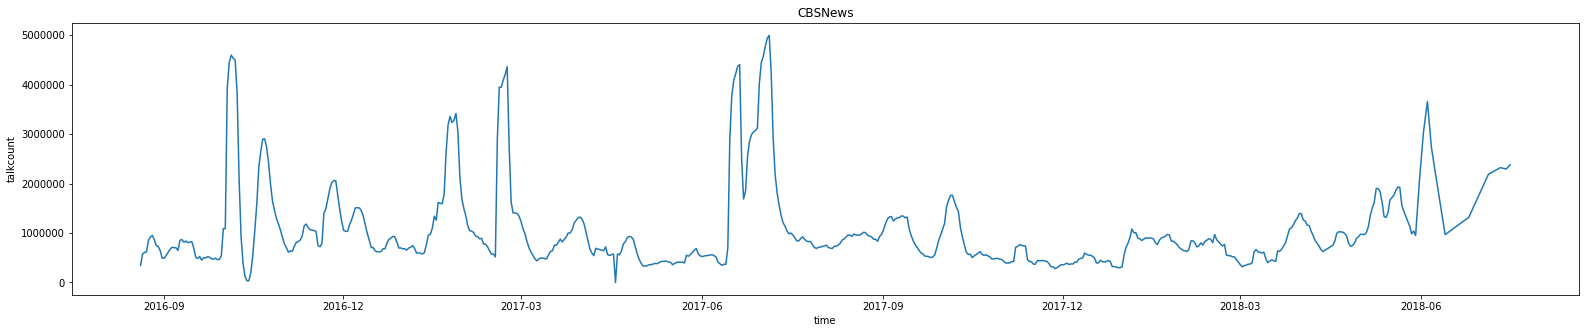

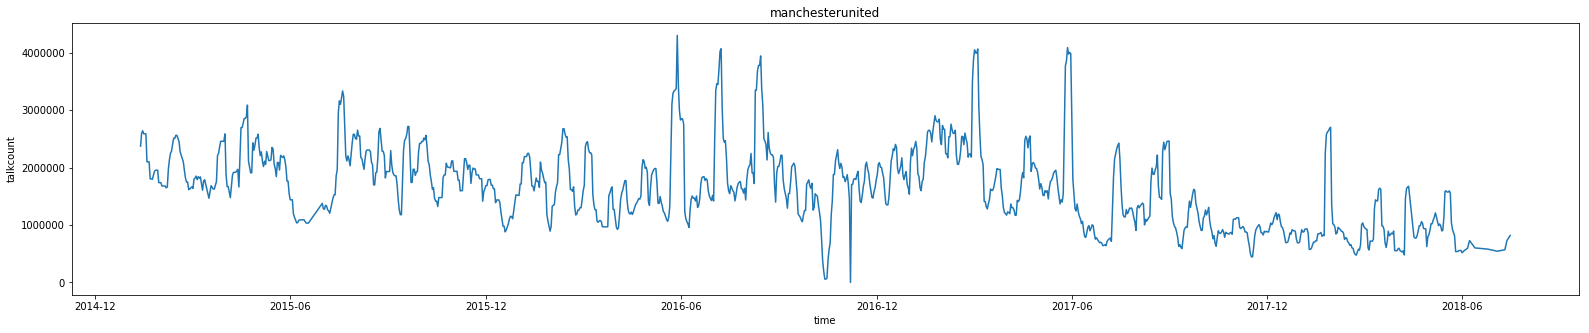

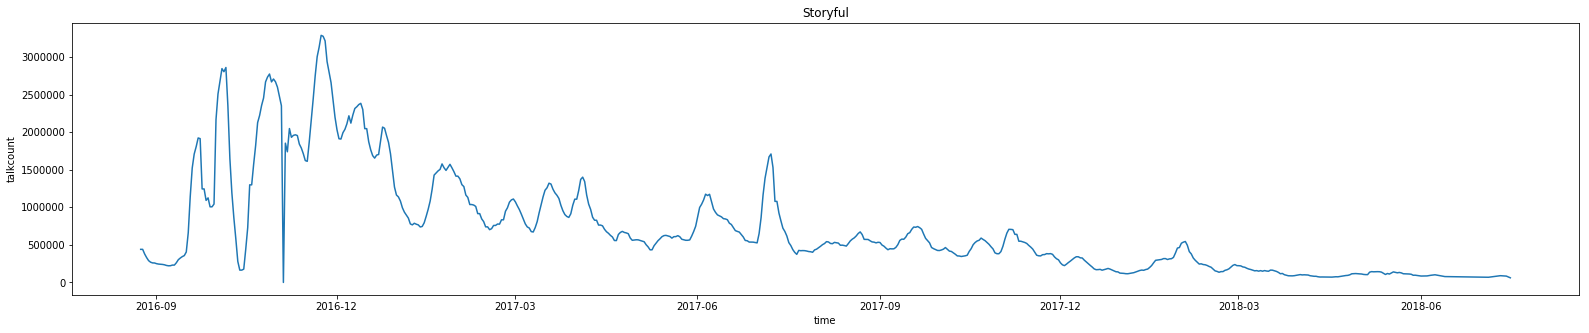

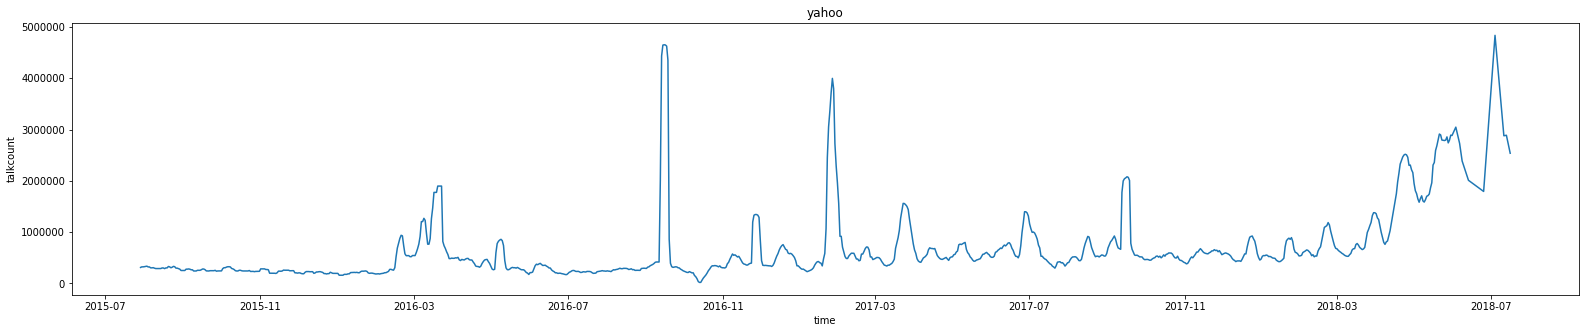

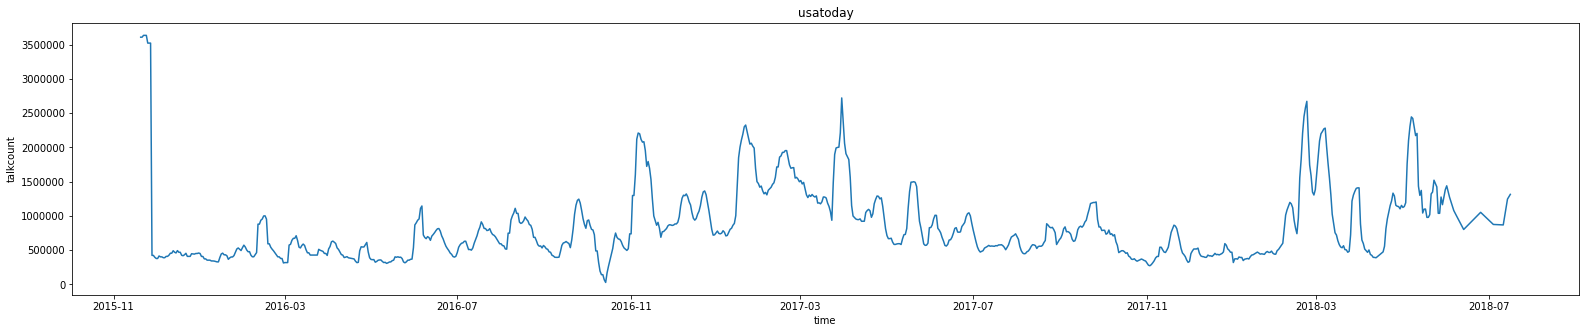

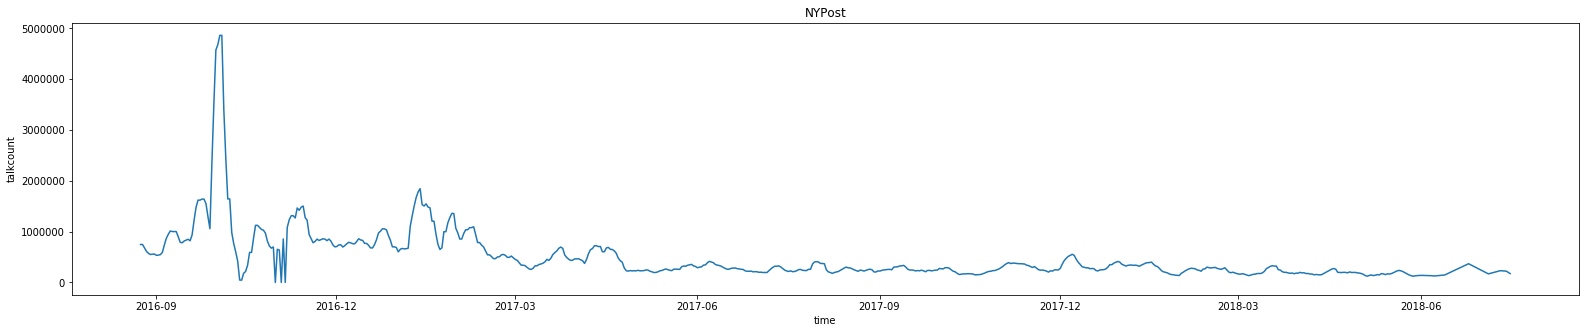

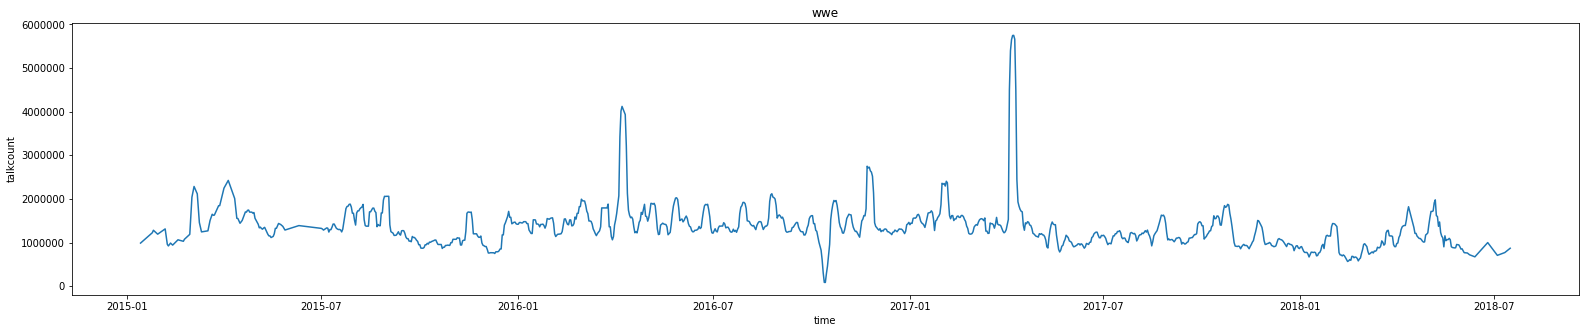

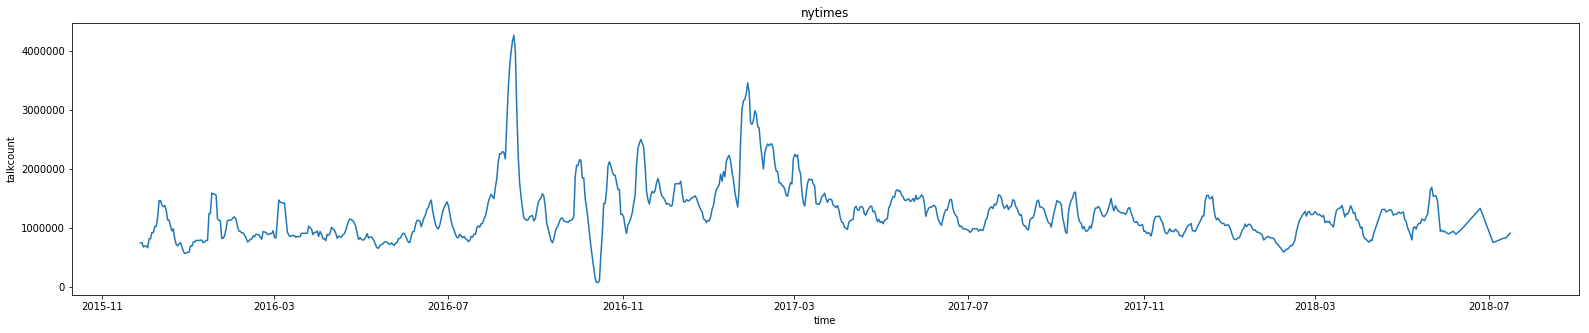

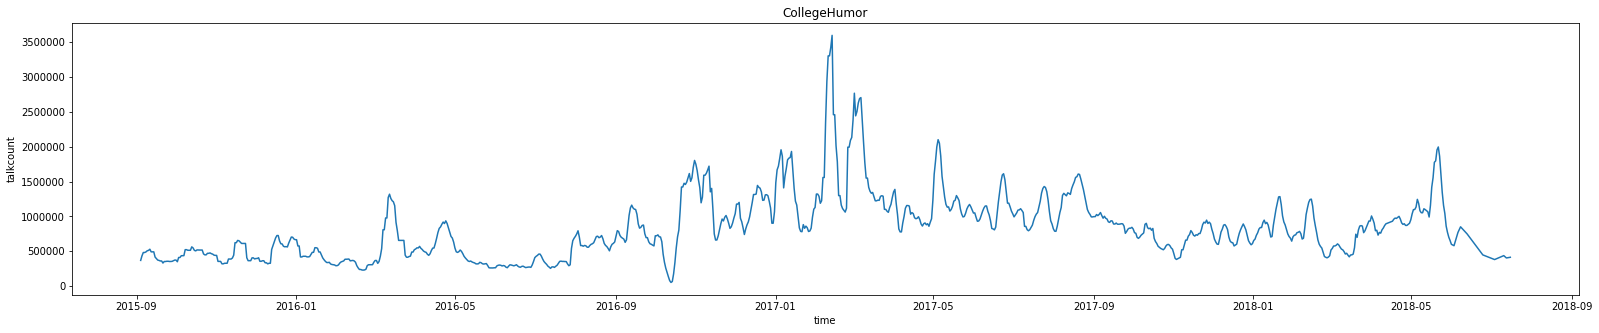

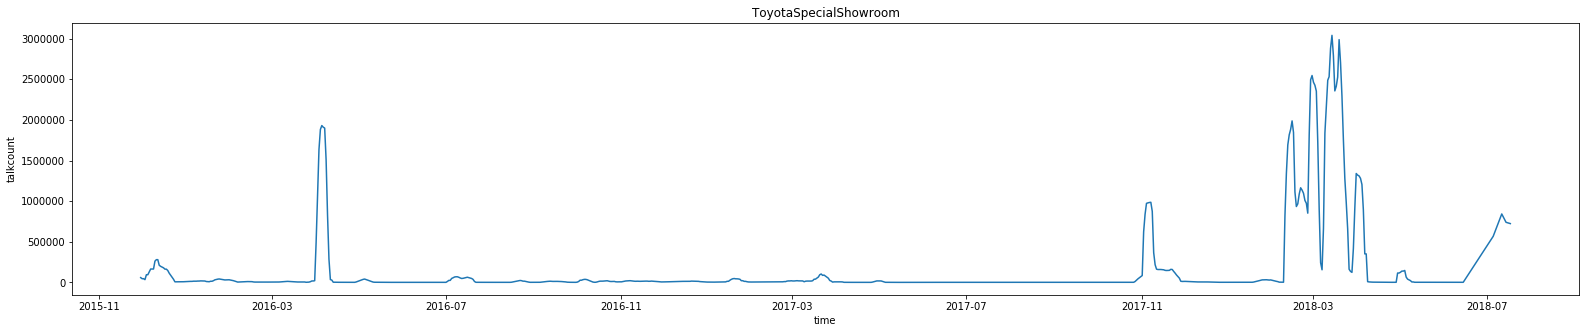

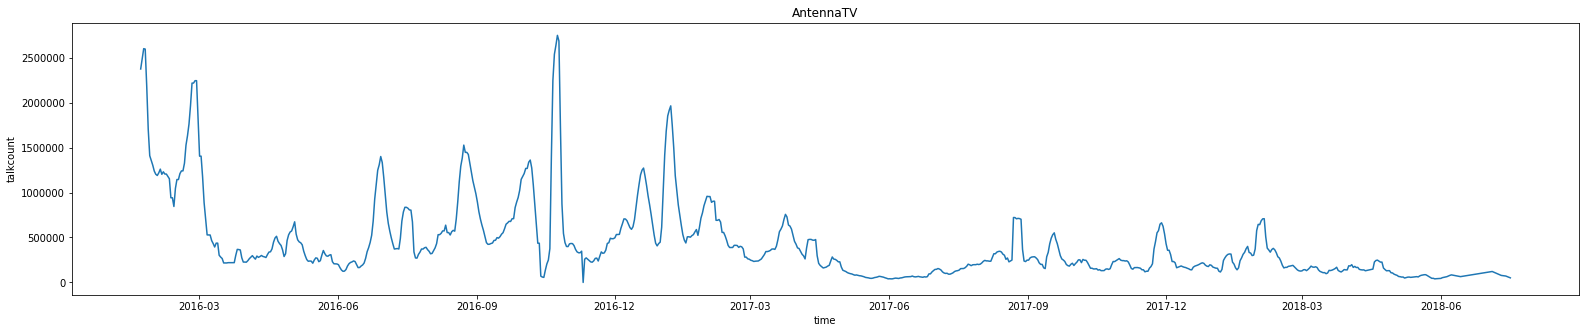

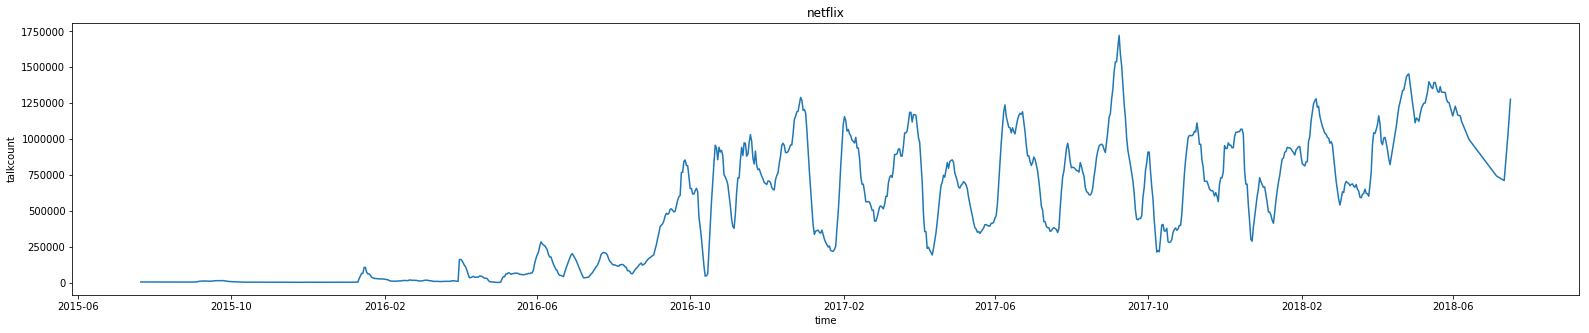

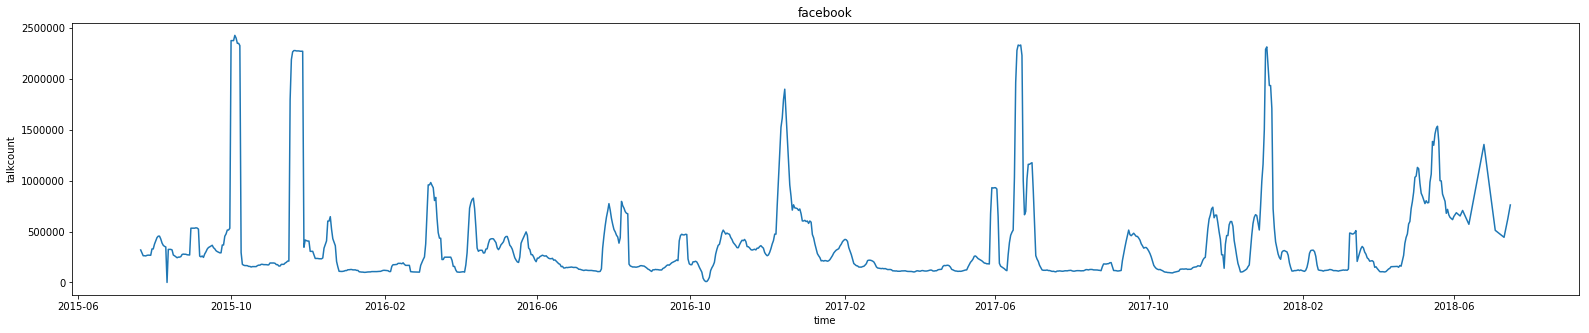

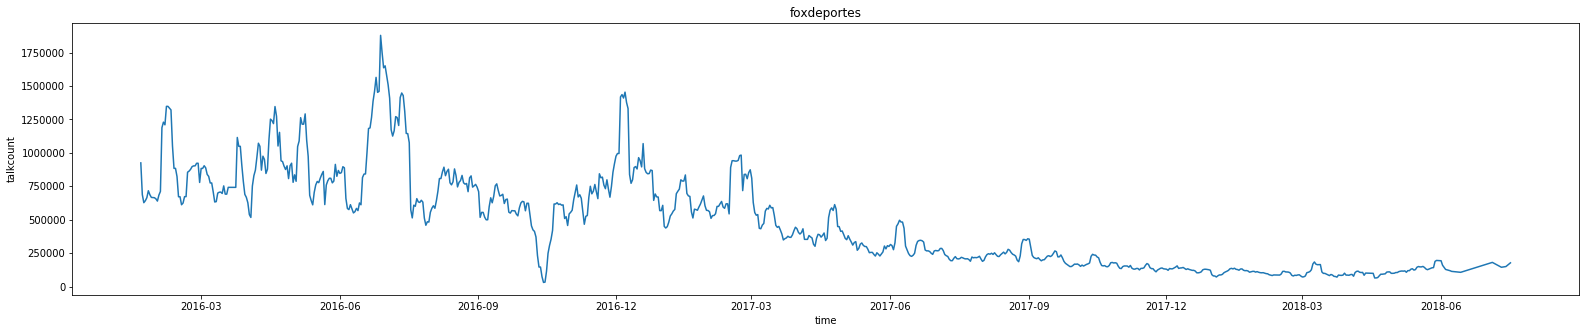

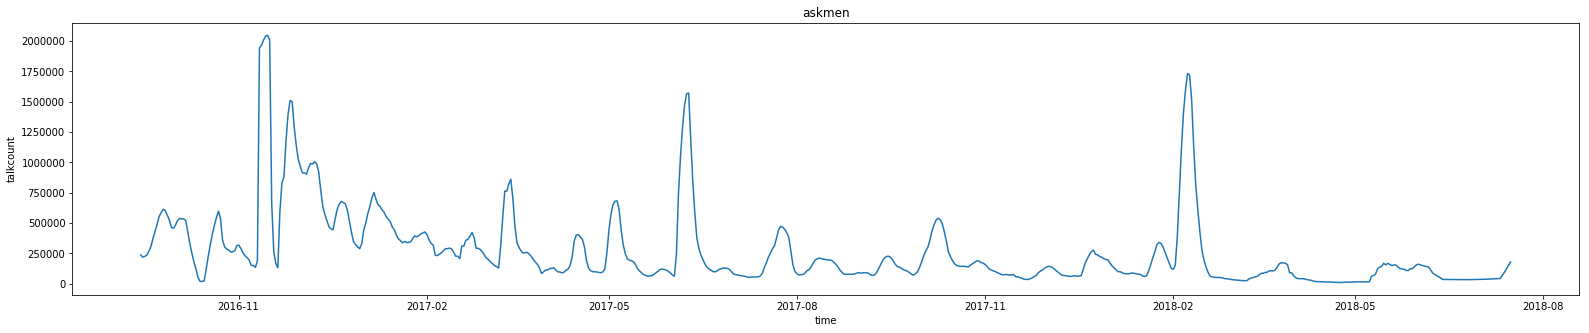

In [107]:
for i in range(15):
    fig = plt.figure(figsize=(27, 5))
    talkcount = list(view[i]['talking_about_count'])
    time = list(view[i]['time'])
    plt.ylabel('talkcount')
    plt.xlabel('time')
    plt.title(view[i]['username'].iloc[0])
    plt.plot(time, talkcount)
    plt.show()
    plt.close()

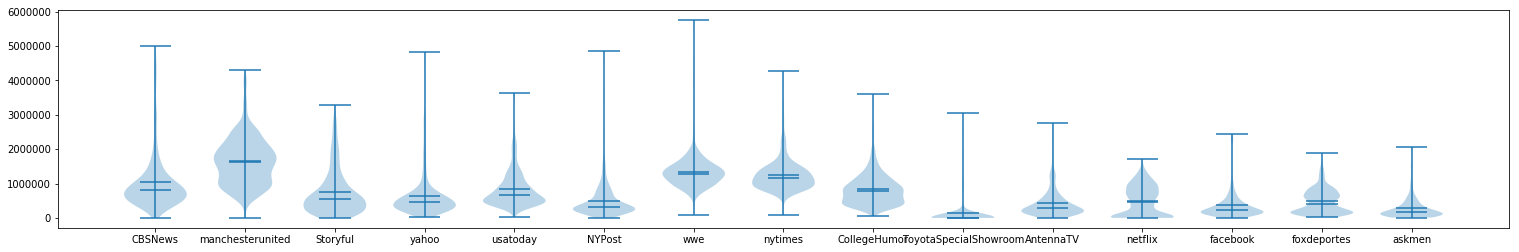

In [43]:
pos = []
for i in range(15):
    pos.append(i)
fig,ax = plt.subplots(figsize=(26,4))
ax.violinplot(talkabout, pos,points=80,widths=0.7,
                    showmeans=True,showextrema=True,showmedians=True)
ax.set_xticks(pos)
ax.set_xticklabels(top15)
plt.show()